In [201]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [203]:
df = pd.read_csv("BlackFriday.csv")
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [207]:
#df["Age"] = df["Age"].astype(int)

In [209]:
df.shape

(537577, 12)

In [211]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [213]:
df.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [215]:
# Check missing data
missing_data = df.isnull().mean() * 100  # Percentage of missing values per column
print("Missing data percentage:\n", missing_data)

Missing data percentage:
 User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.062713
Product_Category_3            69.441029
Purchase                       0.000000
dtype: float64


In [217]:
sparse_columns = ['Product_Category_2', 'Product_Category_3']
df = df.drop(columns=sparse_columns, errors='ignore')  # errors='ignore' skips columns not found

In [219]:
# Verify columns are dropped
print("Remaining columns:\n", df.columns)

Remaining columns:
 Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')


In [221]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [223]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
537572    False
537573    False
537574    False
537575    False
537576    False
Length: 537577, dtype: bool

In [225]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,23961.000000


In [227]:
df["Age"].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [229]:
df["City_Category"].unique()


array(['A', 'C', 'B'], dtype=object)

In [231]:
df["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [233]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


C:\Users\12vat\AppData\Local\Temp\ipykernel_19468\1540529936.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender'] == 'Male']['Purchase'], bins=30, color='blue', label='Male', kde=False)
C:\Users\12vat\AppData\Local\Temp\ipykernel_19468\1540529936.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

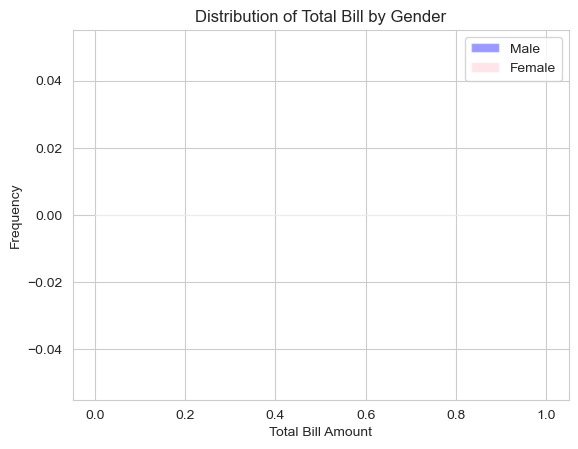

In [235]:
sns.set_style('whitegrid')
sns.distplot(df[df['Gender'] == 'Male']['Purchase'], bins=30, color='blue', label='Male', kde=False)
sns.distplot(df[df['Gender'] == 'Female']['Purchase'], bins=30, color='pink', label='Female', kde=False)
plt.legend()
plt.title('Distribution of Total Bill by Gender')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.show()

<Axes: >

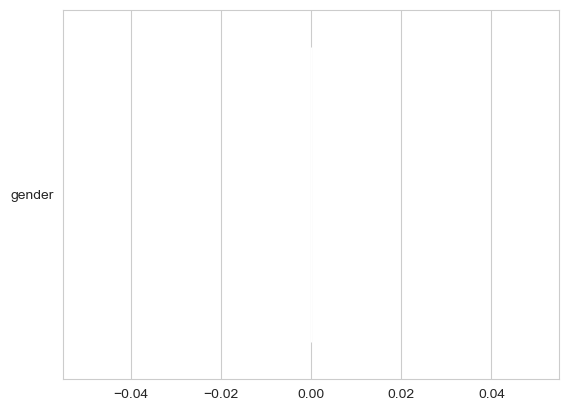

In [237]:
sns.barplot("gender")

In [239]:
f = 0  
m = 0  
for i in df["Gender"]:
    if i == 'F':
        f += 1
    elif i == 'M':  
        m += 1
print(f"Number of females: {f}")
print(f"Number of males: {m}")

Number of females: 132197
Number of males: 405380


**Goal:** Analyze the gender distribution of the customers and examine if there are any purchasing trends based on gender.
Actions:

**Data Imbalance:** A significantly higher number of male customers compared to female customers in the dataset.

**Groupby Function:** By using the groupby() function, we grouped the data by gender and found that male customers were responsible for a larger portion of the purchases.

<Axes: ylabel='Ratio'>

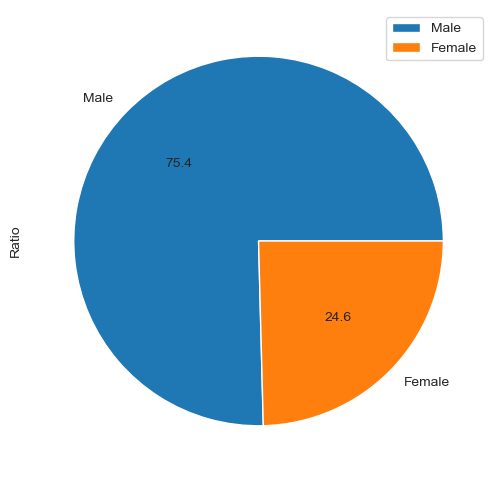

In [242]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

<Axes: title={'center': 'Gender Ratio'}>

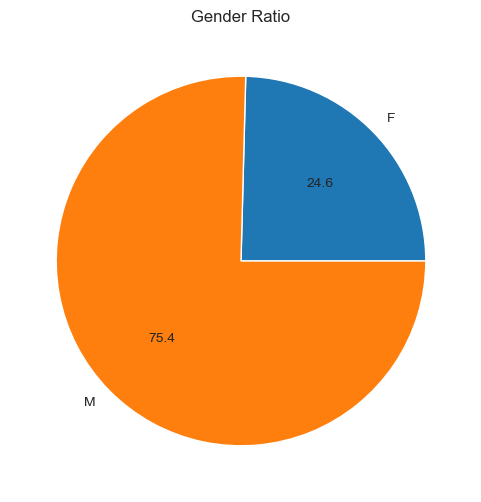

In [244]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

<Axes: xlabel='Gender'>

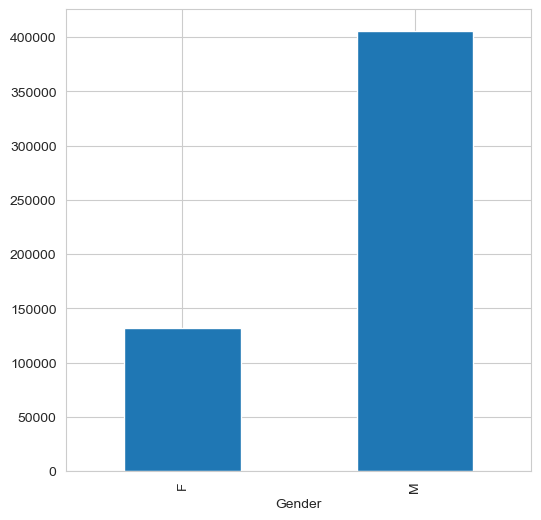

In [246]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

In [248]:
df.groupby("Gender").size()

Gender
F    132197
M    405380
dtype: int64

<Axes: xlabel='Age'>

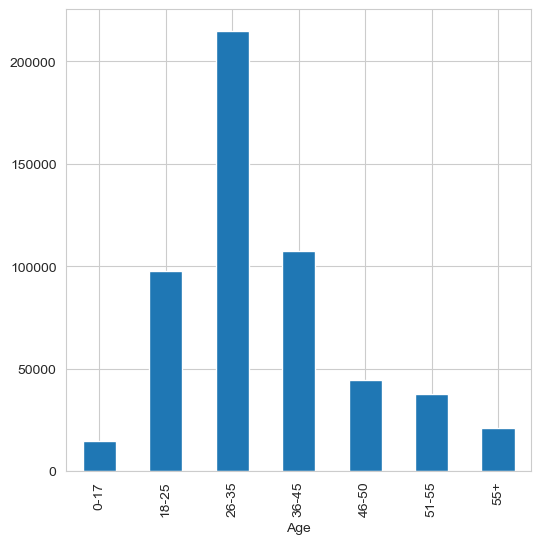

In [250]:
df.groupby('Age').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<Axes: xlabel='Age,Gender,Marital_Status'>

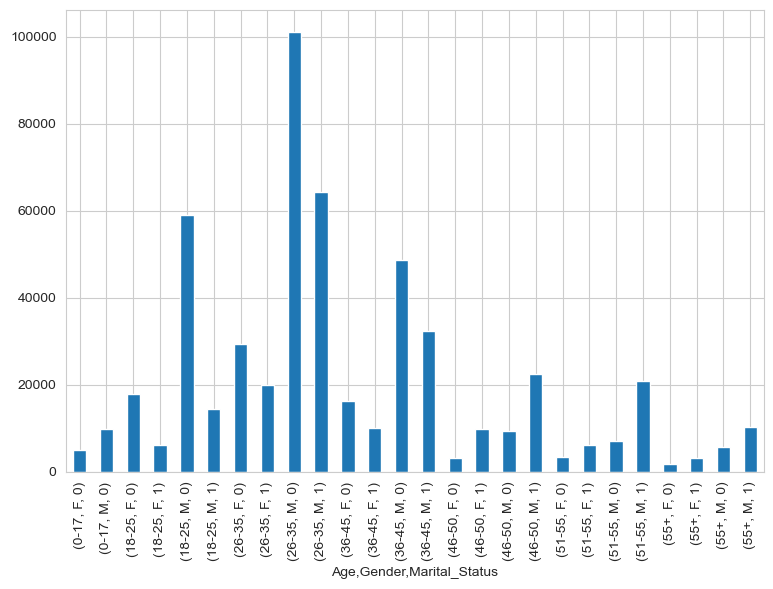

In [252]:
df.groupby(['Age', 'Gender', 'Marital_Status']).size().plot(kind='bar', figsize=(9,6))

In [253]:
sns.groupby

AttributeError: module 'seaborn' has no attribute 'groupby'

<Axes: xlabel='City_Category', ylabel='count'>

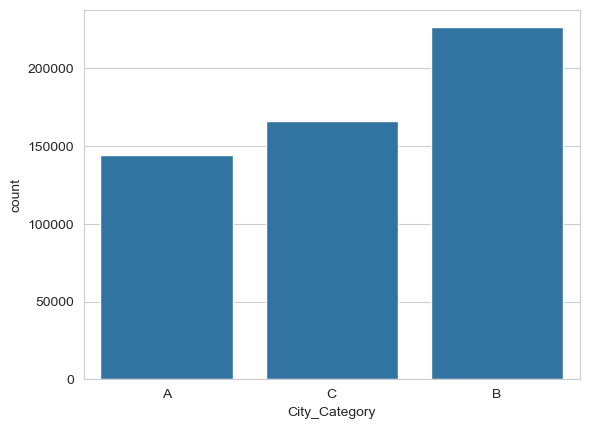

In [258]:
sns.countplot(x = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

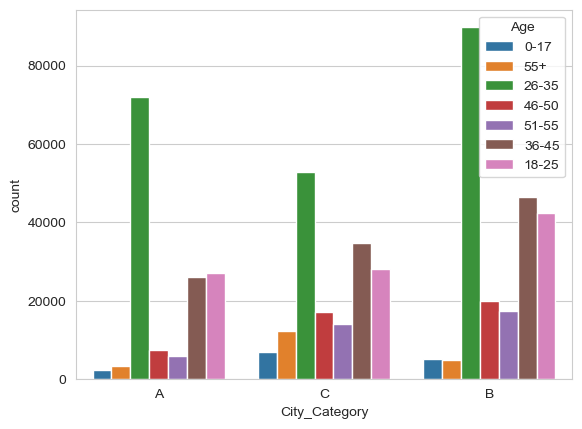

In [260]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

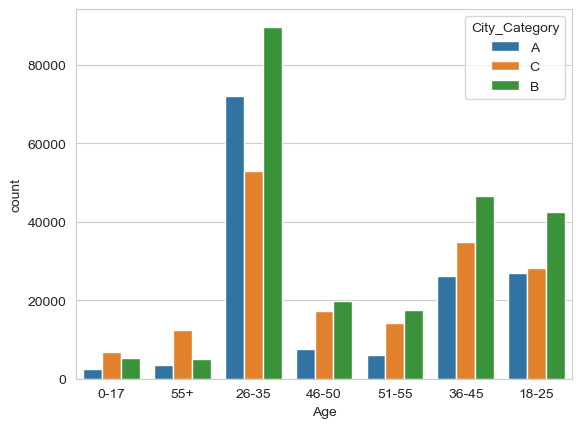

In [262]:
sns.countplot(x = 'Age', hue = 'City_Category', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

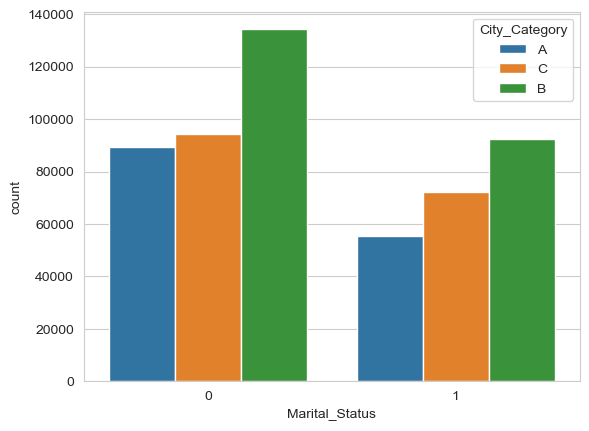

In [264]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

In [256]:
# plt.figure(figsize = (15,20))
# sns.boxplot(df)
# plt.show()

In [ ]:
# mode = df.mode()
# print(mode)